# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [57]:
# Import your libraries
from scipy.stats import normaltest
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [37]:
# Your code here
n1=np.random.normal(loc=50,scale=5,size=10)
n2=np.random.normal(loc=50,scale=5,size=50)
n3=np.random.normal(loc=50,scale=5,size=500)
n4=np.random.normal(loc=50,scale=5,size=5000)

t1=normaltest(n1)
t2=normaltest(n2)
t3=normaltest(n3)
t4=normaltest(n4)

print(t1,t2,t3,t4)

NormaltestResult(statistic=1.8934974213432103, pvalue=0.3880004767309492) NormaltestResult(statistic=3.666292089251299, pvalue=0.15990969255495283) NormaltestResult(statistic=0.12999799755676425, pvalue=0.9370684015900749) NormaltestResult(statistic=0.40926753341374356, pvalue=0.814945722020541)


/home/david/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


#### Interpret the normaltest results and make your observations.

# Explain the test results here

normaltest takes as null hypothesis that the sample comes from a normal distribution, as the p value is really high, we cannot reject the null hypothesis

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

(array([  10.,   76.,  321.,  803., 1343., 1332.,  822.,  242.,   44.,
           7.]),
 array([31.80756233, 35.51832591, 39.22908949, 42.93985308, 46.65061666,
        50.36138024, 54.07214382, 57.7829074 , 61.49367098, 65.20443456,
        68.91519815]),
 <a list of 10 Patch objects>)

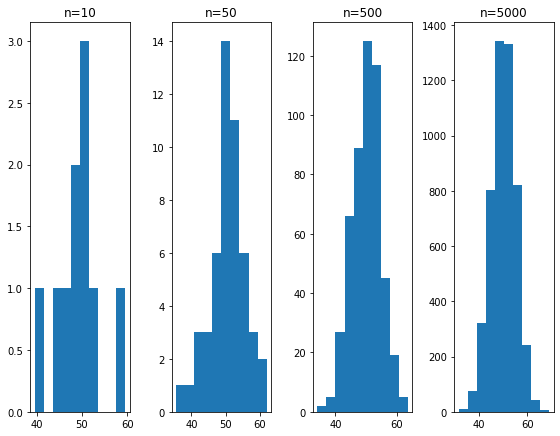

In [36]:
# Your code here
fig, ax=plt.subplots(1,4,figsize=(8,6))
fig.tight_layout()

ax[0].title.set_text("n=10")
ax[1].title.set_text("n=50")
ax[2].title.set_text("n=500")
ax[3].title.set_text("n=5000")
ax[0].hist(n1)
ax[1].hist(n2)
ax[2].hist(n3)
ax[3].hist(n4)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

# Your comment and explanation here
As bigger is the sample, the most it can be approximated to a normal distribution

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

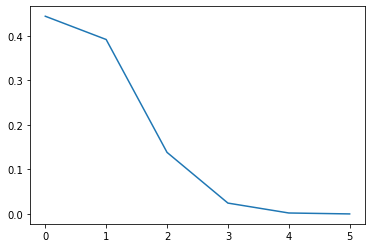

In [69]:
# Your code here
n=5
x=np.arange(0,n+1)
y=binom.pmf(x,n,0.15)

plt.plot(x,y);

#### Explain what you observe from the plot above

# Your comment here

There is less probability of the video been seen for a larger number of persons

#### Now plot PMP with 50, 500, and 5000 visitors.

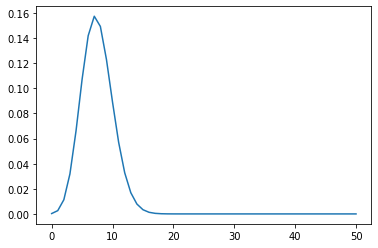

In [70]:
n=50
x=np.arange(0,n+1)
y=binom.pmf(x,n,0.15)

plt.plot(x,y);



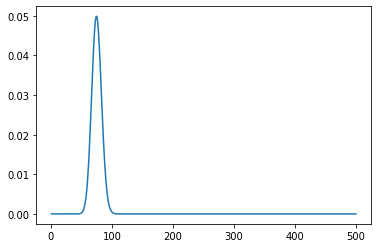

In [49]:
n=500
x=np.arange(0,n+1)
y=binom.pmf(x,n,0.15)

plt.plot(x,y);

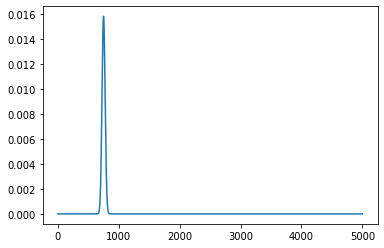

In [68]:
n=5000
x=np.arange(0,n+1)
y=binom.pmf(x,n,0.15)

plt.plot(x,y);

#### What did you notice from the distribution plots? Comment your findings.

# Your comment here
We found that for a n big enough, binomial distribution can be approximated as a normal distribution 

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

# Your comment here

Poisson distributions give us the probability of an event occuring k times in a given interval knowing that this event is expected to occurs lambda times in the given interval 

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [113]:
poisson.pmf(320,300)



0.011612348610402475

#### What is the probability of getting 60 visits?

In [114]:
# Your code here
poisson.pmf(60,300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [107]:
# your code here
x=np.arange(1001)
y=poisson.cdf(x,300)

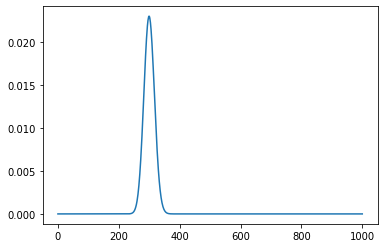

In [108]:
plt.plot(x,y);